<a href="https://colab.research.google.com/github/cjsmocjsmo/AmpnadoAMD/blob/master/maker_GM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 194kB 7.6MB/s 
     |████████████████████████████████| 1.0MB 13.0MB/s 
     |████████████████████████████████| 5.5MB 25.9MB/s 
     |████████████████████████████████| 645kB 49.4MB/s 
     |████████████████████████████████| 71kB 12.4MB/s 
     |████████████████████████████████| 1.2MB 36.6MB/s 
     |████████████████████████████████| 849kB 36.6MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 194kB 47.1MB/s 
     |████████████████████████████████| 358kB 41.9MB/s 
     |████████████████████████████████| 174kB 50.2MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 706kB 45.2MB/s 
     |████████████████████████████████| 37.6MB 1.3MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=ea3fa4f31da0b734e2fb7d679b45a204c8c4a18f6ad0e9d82f60b39c729cad4f
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dc

Import the required packages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [ ]:
#image_path = tf.keras.utils.get_file(
#      '224Images',
#      '/content/drive/MyDrive/224Images')
      #extract=True)
image_path = '/content/drive/MyDrive/'
print(image_path)
image_path = os.path.join(os.path.dirname(image_path), '224Gma')
print(image_path)

/content/drive/MyDrive/
/content/drive/MyDrive/224Gma


In [ ]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 794, num_label: 2, labels: grandma, notgrandma.


Step 2. Customize the TensorFlow model.

In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
22/22 [==============================] - 109s 5s/step - loss: 0.6691 - accuracy: 0.6330
Epoch 2/5
22/22 [==============================] - 27s 1s/step - loss: 0.4153 - accuracy: 0.8437
Epoch 3/5
22/22 [==============================] - 26s 1s/step - loss: 0.3637 - accuracy: 0.8755
Epoch 4/5
22/22 [=================

Step 3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

3/3 [==============================] - 13s 3s/step - loss: 0.3091 - accuracy: 0.9375


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata.

You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='/content/drive/MyDrive/GMModels')

INFO:tensorflow:Assets written to: /tmp/tmplur_ly_u/assets


INFO:tensorflow:Assets written to: /tmp/tmplur_ly_u/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpplvhrtrb/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpplvhrtrb/labels.txt.


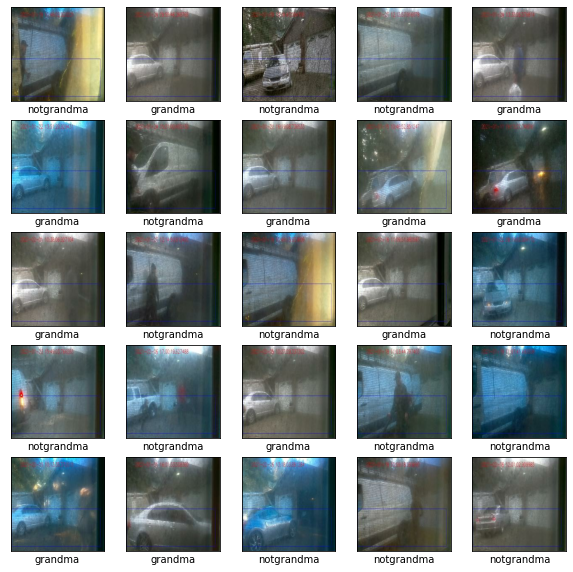

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_data)

3/3 [==============================] - 4s 854ms/step - loss: 0.3091 - accuracy: 0.9375


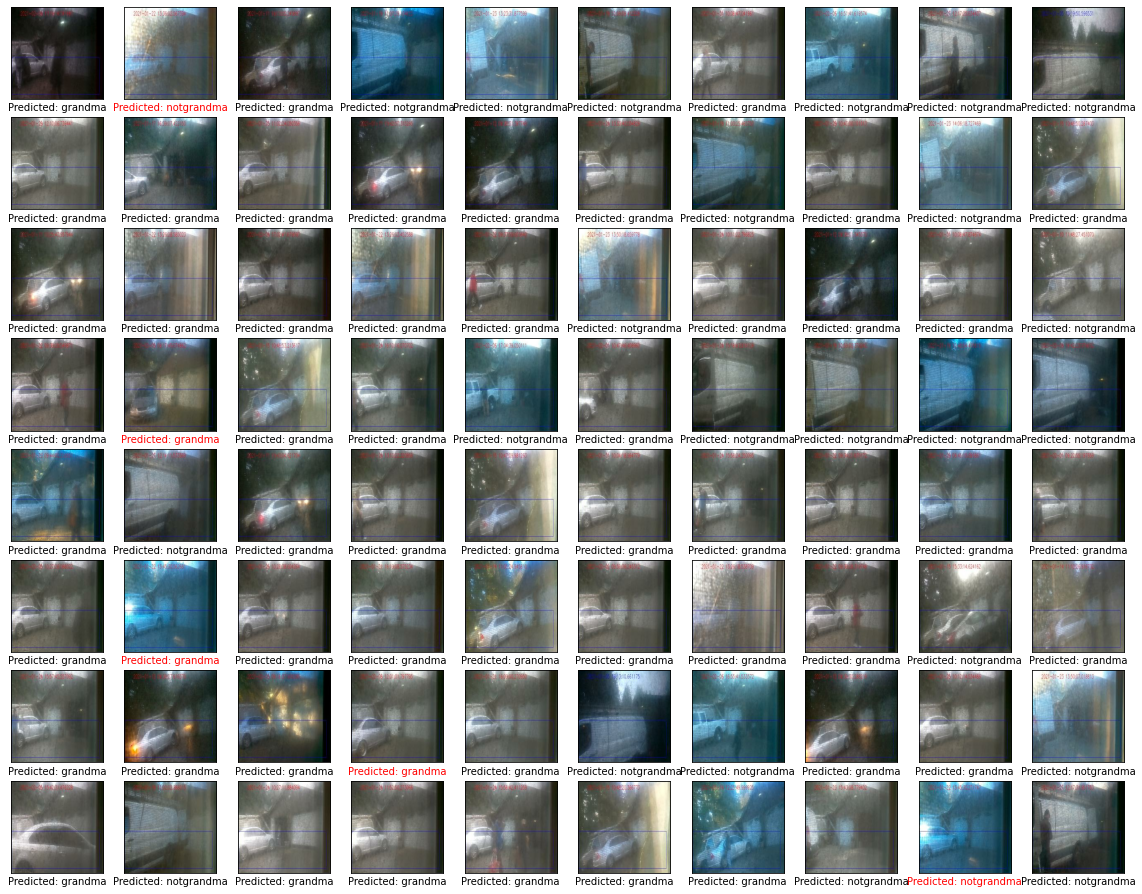

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/GMModels/')

INFO:tensorflow:Assets written to: /tmp/tmppu9x8agy/assets


INFO:tensorflow:Assets written to: /tmp/tmppu9x8agy/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpi5r1ugpw/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpi5r1ugpw/labels.txt.


In [ ]:
model.export(export_dir='/content/drive/MyDrive/GMModels/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/drive/MyDrive/GMModels/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/MyDrive/GMModels/labels.txt.


In [ ]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

In [ ]:
model.export(export_dir='/content/drive/MyDrive/GMModels/', tflite_filename='GMModel_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpn0slt7bw/assets


INFO:tensorflow:Assets written to: /tmp/tmpn0slt7bw/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp07m581e7/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp07m581e7/labels.txt.
